In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### BMI Data

In [6]:
df = pd.DataFrame({
    'weight': [51, 62, 69, 64, 65, 56, 58, 57, 55],
    'height': [167, 182, 176, 173, 172, 174, 169, 173, 170],
    'class': ['Under', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 
              'Under', 'Normal', 'Normal']    
    })

In [7]:
df

,weight,height,class
0,51,167,Under
1,62,182,Normal
2,69,176,Normal
3,64,173,Normal
4,65,172,Normal
5,56,174,Normal
6,58,169,Under
7,57,173,Normal
8,55,170,Normal


### Euclidean distance between 2 points

In [8]:
def euclidean_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    return distance

In [9]:
new_point = {'weight': 57, 'height': 170}

In [10]:
import math
distance = []

x1 = new_point['weight']
y1 = new_point['height']

for i in range(len(df)):
    x2 = df.iloc[i]['weight']
    y2 = df.iloc[i]['height']
    dist = euclidean_distance(x1, y1, x2, y2)
    distance.append(dist)
    print(x1, y1, x2, y2, dist)

57 170 51 167 6.708203932499369
57 170 62 182 13.0
57 170 69 176 13.416407864998739
57 170 64 173 7.615773105863909
57 170 65 172 8.246211251235321
57 170 56 174 4.123105625617661
57 170 58 169 1.4142135623730951
57 170 57 173 3.0
57 170 55 170 2.0


In [11]:
df['distance'] = distance
print(df.sort_values(by = 'distance', ascending = True))

   weight  height   class   distance
6      58     169   Under   1.414214
8      55     170  Normal   2.000000
7      57     173  Normal   3.000000
5      56     174  Normal   4.123106
0      51     167   Under   6.708204
3      64     173  Normal   7.615773
4      65     172  Normal   8.246211
1      62     182  Normal  13.000000
2      69     176  Normal  13.416408


In [12]:
df = pd.read_csv('diabetes.csv')

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.shape

(768, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.columns[:]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
df.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [18]:
for column in df.columns[:-1]:
    if(df[column] == 0).any():
        mean = int(df[column].mean(skipna = True))
        df[column] = df[column].replace(0, mean)

In [19]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,3,137,40,35,168,43.1,2.288,33,1


In [21]:
from sklearn.model_selection import train_test_split
# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,3,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,20,79,22.4,0.207,27
270,10,101,86,37,79,45.6,1.136,38
435,3,141,69,20,79,42.4,0.205,29


In [24]:
# fit finds mean and standard deviation. transform is going to scales it. feature scaling
# mean normalization = normalizing around the mean. x1 = (x1 - u1)/(max x - min x)
# z score normalization x' = (x - μ) / standard deviation

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-1.07716133, -0.89556874, -0.99332564, ..., -1.20189959,
        -0.61421636, -0.94861028],
       [ 0.2902988 , -0.56346432, -0.01037257, ...,  0.6661343 ,
        -0.90973787, -0.43466673],
       [-0.39343127,  0.43284895, -0.33802359, ...,  1.44208685,
        -0.30699103, -0.77729576],
       ...,
       [ 1.99962396, -0.69630609,  1.13640602, ...,  1.91628007,
         1.94892066,  0.42190587],
       [-0.39343127,  0.6321116 , -0.25611083, ...,  1.45645634,
        -0.77514391, -0.34900947],
       [-0.39343127,  0.10074453,  1.95553358, ..., -1.40307247,
        -0.60836445, -1.03426754]])

In [26]:
# shape is rows (m) and columns (n)
# clusters
k = np.round(np.sqrt(df.shape[0]))
k

28.0

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = int(k), p = 2, metric = 'euclidean')

In [28]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))

0.7402597402597403


In [30]:
# Accuracy = (True Positive + True Negative) / Total

In [31]:
print(confusion_matrix(y_test, y_pred))

[[131  20]
 [ 40  40]]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       151
           1       0.67      0.50      0.57        80

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



In [33]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

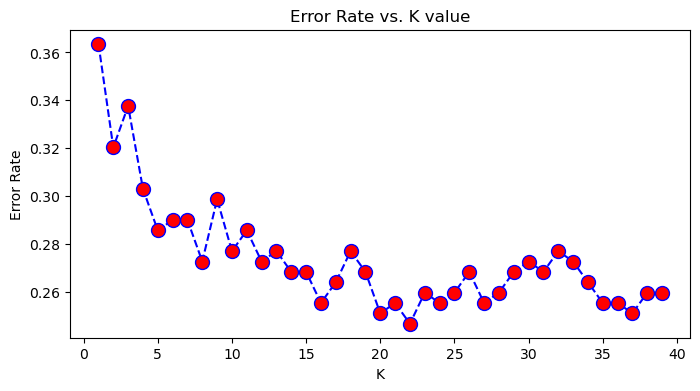

In [34]:
plt.figure(figsize = (8,4))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
# pick a K value from the figure

classifier = KNeighborsClassifier(n_neighbors = 16, p = 2, metric = 'euclidean')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7445887445887446
[[132  19]
 [ 40  40]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       151
           1       0.68      0.50      0.58        80

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



In [36]:
# pick a K value from the figure

classifier = KNeighborsClassifier(n_neighbors = 22, p = 2, metric = 'euclidean')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7532467532467533
[[133  18]
 [ 39  41]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       151
           1       0.69      0.51      0.59        80

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [37]:
from sklearn.neighbors import KNeighborsClassifier

# GridSearchCV cross validation to see which parameters are better
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 9, 16, 22]}
grid_search = GridSearchCV(knn, param_grid, cv = 5)

In [38]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 9, 16, 22]})

In [39]:
print('Best hyperpareters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

Best hyperpareters:  {'n_neighbors': 16}
Best Score:  0.740955776249894
